# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БВТ2004 Казыханов Рамиль Ильясович
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена


### Выполнение:

In [53]:
! pip install matplotlib

/Users/heat/.zshenv:1: permission denied: /Applications/Android Studio.app/Contents/jre/Contents/Home


In [54]:
! pip install networkx

/Users/heat/.zshenv:1: permission denied: /Applications/Android Studio.app/Contents/jre/Contents/Home


In [55]:
! pip install tabulate

/Users/heat/.zshenv:1: permission denied: /Applications/Android Studio.app/Contents/jre/Contents/Home


In [56]:
import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy
import math
from heapq import *

In [73]:
def graph_from_str(str_graph: str) -> list[list[float]]:
    graph = [[weight for weight in row.split()] for row in str_graph.split('\n')] 
    
    for row in range(len(graph)):
        for col in range(len(graph)):
            if graph[row][col] == '-':
                graph[row][col] = math.inf

            graph[row][col] = float(graph[row][col])

    return graph

def read_test_graphs() -> list[list[list[float]]]:
    file = open('Lab6_assets/test_graphs.txt', 'r')
    file_data = file.read()
    file.close()
    
    str_graphs = file_data.split('\n////\n')
    graphs = []
    
    for str_graph in str_graphs:
        graphs.append(graph_from_str(str_graph))
        
    return graphs

def read_graph_from_file() -> list[list[float]]:
    file = open('Lab6_assets/graph.txt', 'r')
    file_data = file.read()
    file.close()

    return graph_from_str(file_data)

def print_matrix(matrix: list[list[int]]):
    print('\n'.join([''.join(['{:8}'.format(str(item)) for item in row]) for row in matrix]))

In [58]:
class Graph:
    def __init__(self, matrix: list[list[int]]):
        self.matrix = matrix
        
    def draw(self, path: list[int]=None):
        G = nx.DiGraph(weighted=False, directed=False, edgesIndexed=True)
        fig = plt.figure(1, figsize=(15, 15), dpi=60)
        
        for row in range(len(self.matrix)):
            for col in range(len(self.matrix)):
                weight = self.matrix[row][col]
                
                if weight < math.inf:
                    G.add_edge(str(row + 1), str(col + 1), weight=weight)
                
        pos = nx.spring_layout(G, seed=1)
        
        edges = G.edges(data=True)
        path_edges = []
    
        for i in range(1, len(path)):
            path_edges.append((str(path[i - 1]), str(path[i])))
            
        other_edges = [edge for edge in edges if edge not in path_edges]
        
        weights = dict()

        for (u, v, d) in edges:
            weights[(u, v)] = d['weight']
            
        nx.draw_networkx_nodes(G, pos, node_size=700, node_color='#92c7f0')
        nx.draw_networkx_edges(G, pos, edgelist=other_edges, width=3, arrowsize=15, node_size = 1400)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=5, arrowsize=25, node_size = 1400, edge_color='red')
        nx.draw_networkx_labels(G, pos, font_size=20)
        nx.draw_networkx_edge_labels(G, pos, font_size=15, edge_labels=weights, rotate=False)

        plt.axis("off")

In [59]:
matrix = read_graph_from_file()
graph = Graph(matrix)
print_matrix(matrix)
start = int(input('Введите начальный узел: '))
end = int(input('Введите конечный узел: '))

inf     inf     9.0     inf     inf     
11.0    inf     inf     5.0     8.0     
inf     inf     inf     inf     2.0     
7.0     inf     inf     inf     inf     
inf     8.0     inf     14.0    inf     
Введите начальный узел: 1
Введите конечный узел: 4


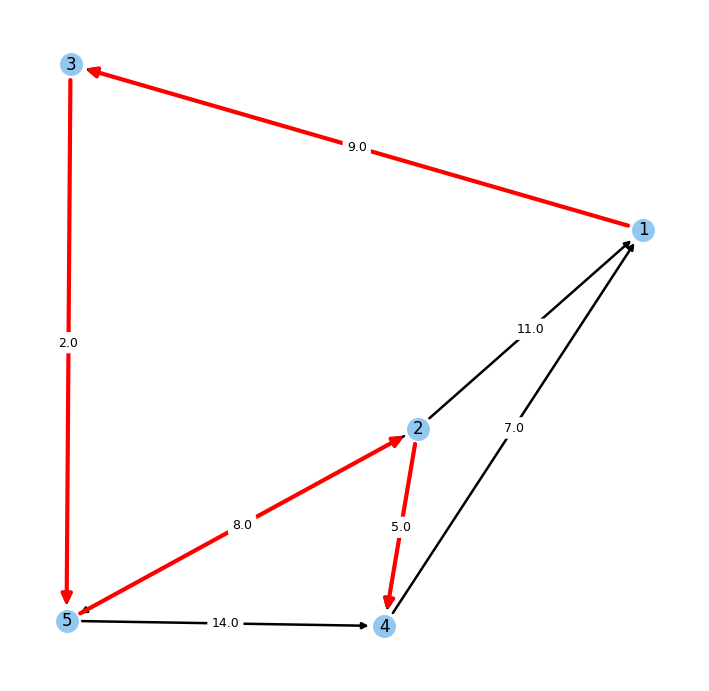

In [60]:
# Алгоритм Флойда-Уоршелла
def floyd_warshall(graph: list[list[int]], start: int, end: int) -> list[int]:
    inf_graph = deepcopy(graph)
    prev_graph = [[None for _ in range(len(graph))] for _ in range(len(graph))]
    start -= 1
    end -= 1
    
    for row in range(len(inf_graph)):
        for col in range(len(inf_graph)):
            if col == row:
                inf_graph[row][col] = 0

            if 0 < inf_graph[row][col] < math.inf:
                prev_graph[row][col] = row
                  
    for k in range(len(inf_graph)):
        for i in range(len(inf_graph)):
            for j in range(len(inf_graph)):
                if inf_graph[i][k] + inf_graph[k][j] < inf_graph[i][j]:    
                    inf_graph[i][j] = inf_graph[i][k] + inf_graph[k][j]
                    prev_graph[i][j] = prev_graph[k][j]
    
    if prev_graph[start][end] is None:
        return []
    
    path = []
    
    while end != None:
        path.append(end + 1)
        end = prev_graph[start][end]
        
    return list(reversed(path))

path = floyd_warshall(matrix, start, end)
graph.draw(path)

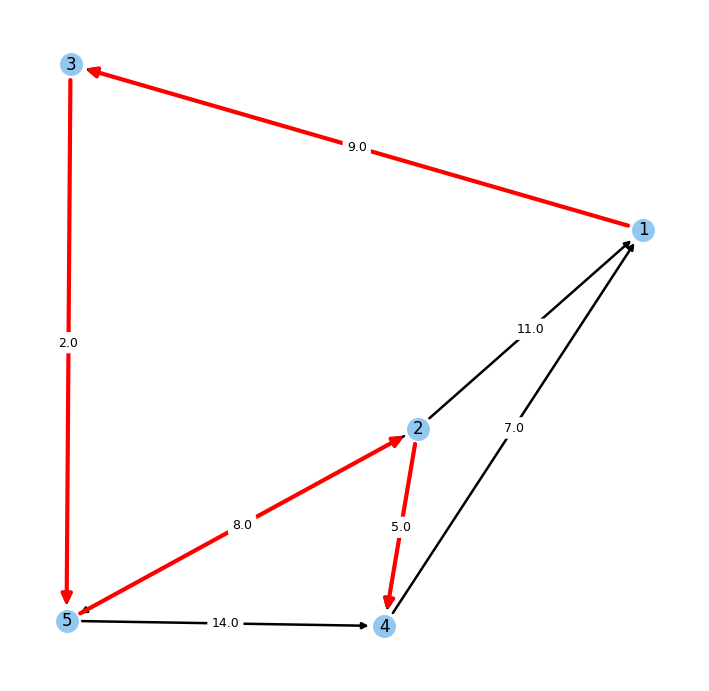

In [61]:
# Алгоритм Дейкстры
class Heap(object):
    def __init__(self):
        self.index = 0
        self.__data = []

    def push(self, item, priority: int):
        heappush(self.__data, (priority, self.index, item))
        self.index += 1

    def pop(self):
        return heappop(self.__data)[2]

    def size(self) -> int:
        return len(self.__data)

    def __str__(self) -> str:
        return str(self.__data)

    def __repr__(self) -> str:
        return self.__str__()

def dijkstra(graph: list[list[int]], start: int, end: int) -> list[int]:
    start -= 1
    end -= 1
    prev_graph = [[None for _ in range(len(graph))] for _ in range(len(graph))]
    
    heap = Heap()
    heap.push(start, 0)
    came_from = {start: None}
    cost_so_far = {start: 0}
    
    while heap.size() > 0:
        current = heap.pop()
        
        if current == end:
            break
            
        neigbors = []
        
        for neighbor in range(len(graph[current])):
            if graph[current][neighbor] < math.inf:
                new_cost = cost_so_far[current] + graph[current][neighbor]
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    priority = new_cost
                    heap.push(neighbor, priority)
                    came_from[neighbor] = current
                    
    if current != end:
        return []
                
    path = []

    while current is not None:
        path.append(str(current + 1))
        current = came_from[current]

    return list(reversed(path))
    
path = dijkstra(matrix, start, end)
graph.draw(path)

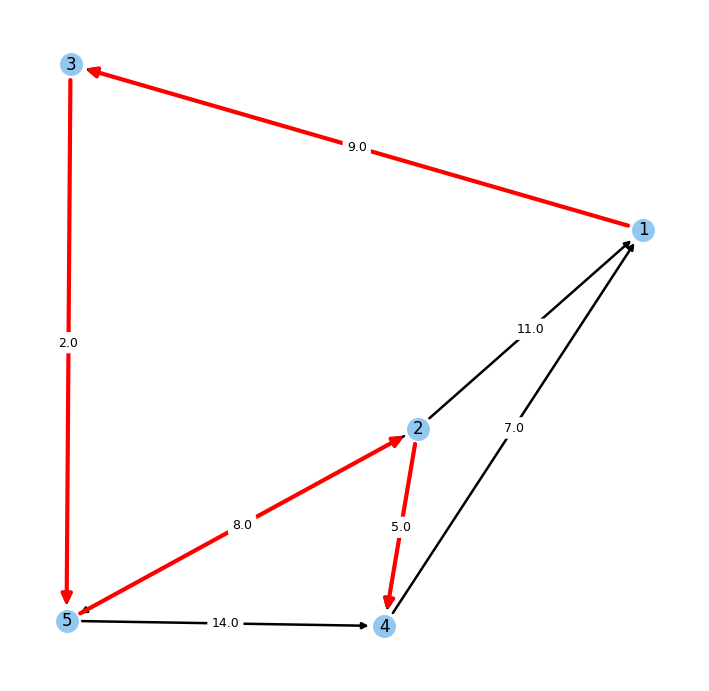

In [62]:
# Алгоритм Беллмана-Форда
def bellman_ford(graph: list[list[int]], start: int, end: int) -> list[int]:                
    start -= 1
    end -= 1
    dist = [math.inf] * len(graph)
    dist[start] = 0
    prevs = [None] * len(graph)
    
    for k in range(len(graph) - 1):
        for i in range(len(graph)):
            for j in range(len(graph)):
                if dist[i] < math.inf and dist[i] + graph[i][j] < dist[j]:
                    prevs[j] = i
                    dist[j] = dist[i] + graph[i][j]
                
    for i in range(len(graph)):
        for j in range(len(graph)):
            if dist[i] < math.inf and dist[i] + graph[i][j] < dist[j]:
                # Граф содержит цикл отрицательного веса
                return []
    
    if prevs[end] == None:
        return []
    
    path = []
            
    while end is not None:
        path.append(str(end + 1))
        end = prevs[end]
    
    return list(reversed(path))

path = bellman_ford(matrix, start, end)
graph.draw(path)

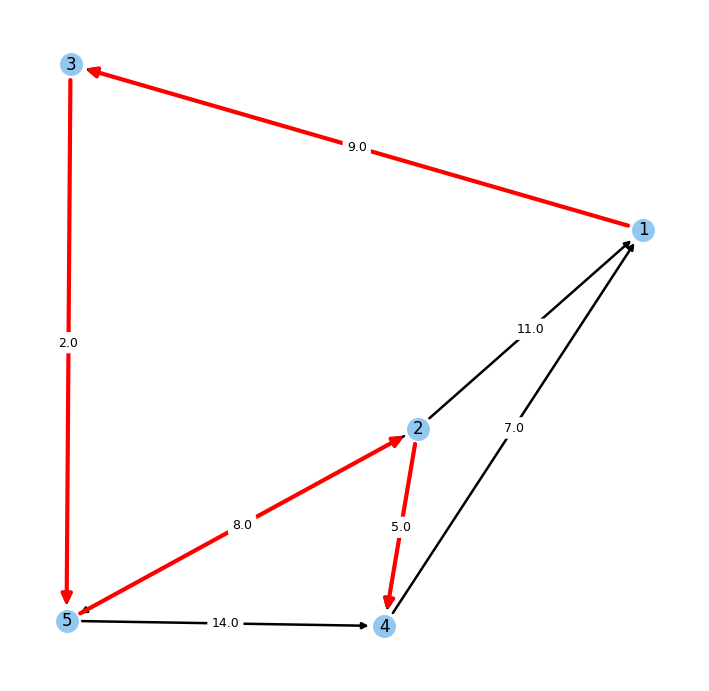

In [63]:
# Алгоритм Джонсона
def johnson(graph: list[list[int]], start: int, end: int) -> list[int]:
    bf_graph = deepcopy(graph)
    
    for row in range(len(bf_graph)):
        bf_graph[row].append(math.inf)
        
    bf_graph.append([0] * len(bf_graph))
    bf_graph[-1].append(math.inf)
    
    dist = [math.inf] * len(bf_graph)
    dist[-1] = 0
    
    for k in range(len(bf_graph) - 1):
        for i in range(len(bf_graph)):
            for j in range(len(bf_graph)):
                if dist[i] < math.inf and dist[i] + bf_graph[i][j] < dist[j]:
                    dist[j] = dist[i] + bf_graph[i][j]
                
    for i in range(len(bf_graph)):
        for j in range(len(bf_graph)):
            if dist[i] < math.inf and dist[i] + bf_graph[i][j] < dist[j]:
                # Граф содержит цикл отрицательного веса
                return []
            
    d_graph = deepcopy(graph)
    
    for row in range(len(d_graph)):
        for col in range(len(d_graph)):
            d_graph[row][col] = d_graph[row][col] + dist[row] - dist[col]
          
    return dijkstra(d_graph, start, end)
            
path = johnson(matrix, start, end)
graph.draw(path)

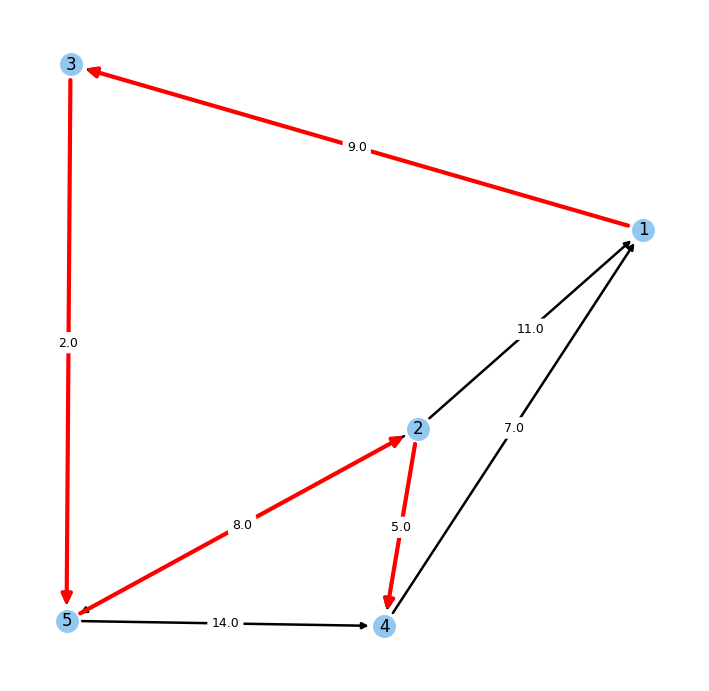

In [64]:
# Алгоритм Левита
def levit(graph: list[list[int]], start: int, end: int) -> list[int]:    
    start -= 1
    end -= 1
    
    dist = [math.inf] * len(graph)
    dist[start] = 0
    
    prevs = [None] * len(graph)
    
    ready = []
    processing = []
    waiting = []
    
    processing.append(start)
    
    for vertex in range(len(graph)):
        if vertex != start:
            waiting.append(vertex)
            
    while len(processing) > 0:
        vertex = processing.pop(0)
        ready.append(vertex)
        
        for neighbor in range(len(graph)):
            if graph[vertex][neighbor] < math.inf:
                if neighbor in waiting:
                    processing.append(neighbor)
                    waiting.remove(neighbor)
                    dist[neighbor] = dist[vertex] + graph[vertex][neighbor]
                    prevs[neighbor] = vertex
                    
                elif neighbor in processing:
                    if dist[vertex] + graph[vertex][neighbor] < dist[neighbor]:
                        dist[neighbor] = dist[vertex] + graph[vertex][neighbor]
                        prevs[neighbor] = vertex
                    
                elif neighbor in ready:
                    if dist[vertex] + graph[vertex][neighbor] < dist[neighbor]:
                        dist[neighbor] = dist[vertex] + graph[vertex][neighbor]
                        processing.insert(0, neighbor)
                        ready.remove(neighbor)
                        prevs[neighbor] = vertex
                                                
    path = []
            
    while end is not None:
        path.append(str(end + 1))
        end = prevs[end]
    
    return list(reversed(path))

                        
path = levit(matrix, start, end)
graph.draw(path)

Порядковый номер кратчайшего пути: 2


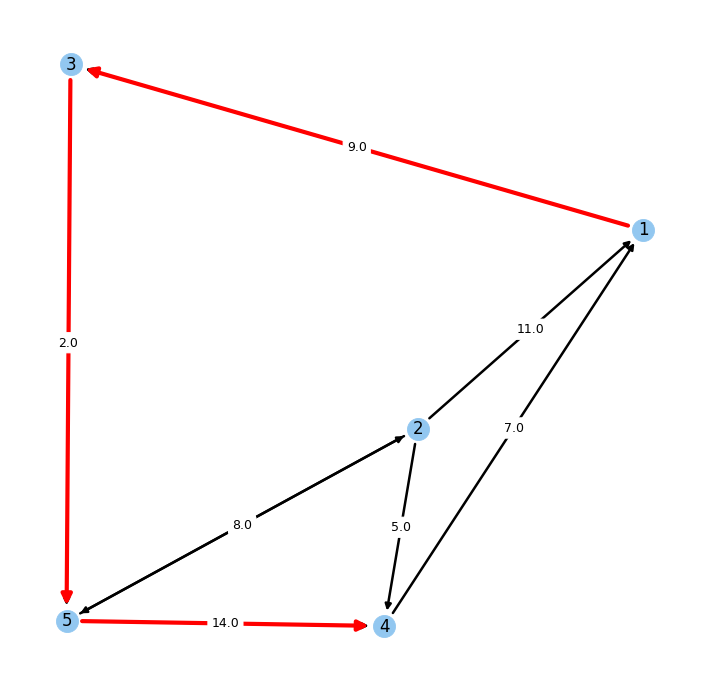

In [65]:
# Алгоритм Йена
def path_length(path: list[int], graph: list[list[int]]):
    length = 0
    
    for i in range(1, len(path)):
        length += graph[int(path[i - 1]) - 1][int(path[i]) - 1]
    
    return length

def yen(graph: list[list[int]], start: int, end: int, k: int) -> list[int]:
    shortest = dijkstra(graph, start, end)
    visited = [shortest]
    
    while k > 1:
        new_shortest = None
        new_shortest_length = math.inf
        
        for i in range(1, len(shortest)):
            new_graph = deepcopy(graph)
            new_graph[int(shortest[i - 1]) - 1][int(shortest[i]) - 1] = math.inf
            
            path = dijkstra(new_graph, start, end)
            path_len = path_length(path, new_graph)
            
            if len(path) > 1 and path_len < new_shortest_length and path not in visited:
                new_shortest_length = path_len
                new_shortest = path
                
        if new_shortest == None:
            return []
                
        shortest = new_shortest
        visited.append(shortest)
        k -= 1
    
    return shortest

path = yen(matrix, start, end, int(input('Порядковый номер кратчайшего пути: ')))
graph.draw(path)

In [76]:
from datetime import datetime as t
from tabulate import tabulate

def vertex_count(graph: list[list[float]]):
    return len(graph)

def edges_count(graph: list[list[float]]):
    count = 0
    
    for row in range(len(graph)):
        for col in range(len(graph)):
            if graph[row][col] < math.inf:
                count += 1
                
    return count

graphs = read_test_graphs()

In [78]:
# Замеры алгоритма Флойда-Уоршелла
table_data = []

for graph in graphs:
    start_time = t.now().timestamp()
    floyd_warshall(graph, 1, 4)
    genertion_time = "{:.4f}".format((t.now().timestamp() - start_time) * 1000)
    
    table_data.append([vertex_count(graph), edges_count(graph), genertion_time])
    
print(tabulate(table_data, headers=['Вершин', 'Рёбер', 'Время выполнения, мс']), end='\n\n')

  Вершин    Рёбер    Время выполнения, мс
--------  -------  ----------------------
       5        8                  0.1202
       5        9                  0.0961
       5       10                  0.093
       6       10                  0.134
       6       11                  0.1361
       6       12                  0.1321
       8       13                  0.2592
       8       14                  0.2542
       8       15                  0.2589



In [79]:
# Замеры алгоритма Дейкстры
table_data = []

for graph in graphs:
    start_time = t.now().timestamp()
    dijkstra(graph, 1, 4)
    genertion_time = "{:.4f}".format((t.now().timestamp() - start_time) * 1000)
    
    table_data.append([vertex_count(graph), edges_count(graph), genertion_time])
    
print(tabulate(table_data, headers=['Вершин', 'Рёбер', 'Время выполнения, мс']), end='\n\n')

  Вершин    Рёбер    Время выполнения, мс
--------  -------  ----------------------
       5        8                  0.062
       5        9                  0.057
       5       10                  0.0629
       6       10                  0.0648
       6       11                  0.0651
       6       12                  0.0641
       8       13                  0.0911
       8       14                  0.0958
       8       15                  0.104



In [80]:
# Замеры алгоритма Беллмана-Форда
table_data = []

for graph in graphs:
    start_time = t.now().timestamp()
    bellman_ford(graph, 1, 4)
    genertion_time = "{:.4f}".format((t.now().timestamp() - start_time) * 1000)
    
    table_data.append([vertex_count(graph), edges_count(graph), genertion_time])
    
print(tabulate(table_data, headers=['Вершин', 'Рёбер', 'Время выполнения, мс']), end='\n\n')

  Вершин    Рёбер    Время выполнения, мс
--------  -------  ----------------------
       5        8                  0.0739
       5        9                  0.056
       5       10                  0.0541
       6       10                  0.083
       6       11                  0.0851
       6       12                  0.1681
       8       13                  0.366
       8       14                  0.36
       8       15                  0.3612



In [81]:
# Замеры алгоритма Джонсона
table_data = []

for graph in graphs:
    start_time = t.now().timestamp()
    johnson(graph, 1, 4)
    genertion_time = "{:.4f}".format((t.now().timestamp() - start_time) * 1000)
    
    table_data.append([vertex_count(graph), edges_count(graph), genertion_time])
    
print(tabulate(table_data, headers=['Вершин', 'Рёбер', 'Время выполнения, мс']), end='\n\n')

  Вершин    Рёбер    Время выполнения, мс
--------  -------  ----------------------
       5        8                  0.252
       5        9                  0.176
       5       10                  0.1812
       6       10                  0.2449
       6       11                  0.2429
       6       12                  0.2398
       8       13                  0.5338
       8       14                  0.6709
       8       15                  0.659



In [82]:
# Замеры алгоритма Левита
table_data = []

for graph in graphs:
    start_time = t.now().timestamp()
    levit(graph, 1, 4)
    genertion_time = "{:.4f}".format((t.now().timestamp() - start_time) * 1000)
    
    table_data.append([vertex_count(graph), edges_count(graph), genertion_time])
    
print(tabulate(table_data, headers=['Вершин', 'Рёбер', 'Время выполнения, мс']), end='\n\n')

  Вершин    Рёбер    Время выполнения, мс
--------  -------  ----------------------
       5        8                  0.0811
       5        9                  0.0451
       5       10                  0.0441
       6       10                  0.047
       6       11                  0.0479
       6       12                  0.047
       8       13                  0.088
       8       14                  0.0708
       8       15                  0.0682



In [85]:
# Замеры алгоритма Йена
table_data = []

for graph in graphs:
    start_time = t.now().timestamp()
    yen(graph, 1, 4, 3)
    genertion_time = "{:.4f}".format((t.now().timestamp() - start_time) * 1000)
    
    table_data.append([vertex_count(graph), edges_count(graph), genertion_time])
    
print(tabulate(table_data, headers=['Вершин', 'Рёбер', 'Время выполнения, мс']), end='\n\n')

  Вершин    Рёбер    Время выполнения, мс
--------  -------  ----------------------
       5        8                  0.4232
       5        9                  0.349
       5       10                  0.416
       6       10                  0.4561
       6       11                  0.4761
       6       12                  0.3898
       8       13                  0.845
       8       14                  1.7619
       8       15                  1.3781



# Вывод

В ходе проделанной лабораторной работы можно сделать вывод о том, что наиболее быстрыми алгоритмами для поиска пути во взвешенном ориентированном графе являются алгоритмы Дейкстры и Левита. Но, не смотря на это, нужно учитывать тот факт, что некоторые другие алогритмы, реализованные в данной лабораторной работе, умеют работать с рёбрами отрицательного веса и даже с графами, у которых имеются циклы отрицательного веса. Поэтому нельзя точно утверждать, какой из представленных алгоритмов является лучшим, а какой - худшим.